In [53]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont


# This is a program tha is going make easier the standart 2-5-1 with two hands


## How do you do 2-5-1?

As the 2-5-1 makes reference to, there are three chords that are going to be played. 
The way to play them is as follow:

chord #2 Left Hand: First and seventh note of the chord

chord #2 Right Hand: Third (minor) and fiveth of the chord. 

chord #5 Left Hand: First and third (mayor)  of the chord.

chord #5 Right Hand: Seventh (minor)----> Same as third from #2

chord #1 Left Hand: First and seventh (mayor)
chord #1 Right Hand: Third (mayor)


In [54]:
#DICCIONARIO
def numbers_to_notes(number):
    notes={0:"C",1:"C#",2:"D",3:"D#",4:"E",5:"F",6:"F#",7:"G",8:"G#",9:"A",10:"A#",11:"B"}

    letter=notes[number]
    
    return letter


    

In [169]:
#FUNCIONES PARCIALES

notes={"C":0,"C#":1,"D":2,"D#":3,"E":4,"F":5,"F#":6,"G":7,"G#":8,"A":9,"A#":10,"B":11}

def second_chord_left_hand(tonica):
    #1 and 7th (TWO NOTES)
    second=(tonica + 2) % 12 
    note1=second  #tonica
    note2=(second+10) % 12  #seventh minor 
    
    return numbers_to_notes(note1),numbers_to_notes(note2)
    
def second_chord_right_hand(tonica):
    #3 and 5th (TWO NOTES)
    second=(tonica + 2) % 12 
    note1=(second + 3) % 12  #third minor
    note2=(second+ 7) % 12   #five just
    
    return numbers_to_notes(note1),numbers_to_notes(note2)

def five_chord_left_hand(tonica):
    #3 and 5th (TWO NOTES)
    five=(tonica + 7) % 12 
    note1=five #third minor
    note2=(five+ 4) % 12   #five just
    
    return numbers_to_notes(note1),numbers_to_notes(note2)

def five_chord_right_hand(tonica):
    #7 minor (ONE NOTEE)
    five=(tonica + 7) % 12 
    note1=(five +10) % 12 #seventh minor
    
    return numbers_to_notes(note1)


def one_chord_left_hand(tonica):
    #1 and 7th mayor (TWO NOTES)
    
    note1=tonica #tonic
    note2=(tonica+11) % 12   #seventh mayor
    
    return numbers_to_notes(note1),numbers_to_notes(note2)

def one_chord_right_hand(tonica):
    #3 mayor (ONE NOTEE)
    note1=(tonica +4) % 12 #third mayor
    
    return numbers_to_notes(note1)

from PIL import Image, ImageDraw

def draw_red_circles(imagen_piano, coordenadas_teclas, color):
    imagen_piano_copy = imagen_piano.copy()
    draw = ImageDraw.Draw(imagen_piano_copy)

    # Dibuja un círculo de color para cada tecla en las coordenadas correspondientes
    for nota, (x, y) in coordenadas_teclas.items():
        draw.ellipse((x - 10, y - 10, x + 10, y + 10), fill=color)

    return imagen_piano_copy

def merge_images(imagen1, imagen2, imagen3):
    # Obtiene las dimensiones de las imágenes
    ancho, alto = imagen1.size

    # Crea una nueva imagen que tendrá el mismo ancho que las imágenes originales y el triple de alto
    imagen_final = Image.new('RGB', (ancho, alto * 3))

    # Pega las tres imágenes en la imagen final
    imagen_final.paste(imagen1, (0, 0))
    imagen_final.paste(imagen2, (0, alto))
    imagen_final.paste(imagen3, (0, alto * 2))


    return imagen_final
    
    
    
def get_chord_notes(tonica):

    notes={"C":0,"C#":1,"D":2,"D#":3,"E":4,"F":5,"F#":6,"G":7,"G#":8,"A":9,"A#":10,"B":11}
    tonica_n=notes[tonica]
    
    #second chord, left hand, TWO NOTES
    segL1,segL2=second_chord_left_hand(tonica_n)
    print(f"Second Chord Left Hand: {segL1} and {segL2}")
    
    
    #second chord, right hand, TWO NOTES
    segR1,segR2=second_chord_right_hand(tonica_n)
    print(f"Second Chord right Hand: {segR1} and {segR2}")
    
    
    
    print("-------------------------------------------------------------------------------")
    
    #five chord, left hand, TWO NOTES
    fivL1,fivL2=five_chord_left_hand(tonica_n)
    print(f"Second Chord Left Hand: {fivL1} and {fivL2}")
    
    #five chord, right hand, ONE NOTES
    fivR1=five_chord_right_hand(tonica_n)
    print(f"Five Chord Right Hand: {fivR1}")
    
    print("-------------------------------------------------------------------------------")
    
    
    #ONE chord, left hand, TWO NOTES
    oneL1,oneL2=one_chord_left_hand(tonica_n)
    print(f"One Chord Left Hand: {oneL1} and {oneL2}")
    
    #ONE chord, right hand, ONE NOTESS
    oneR1=one_chord_right_hand(tonica_n)
    print(f"One Chord Right Hand: {oneR1}")
    
    notes=[segL1, segL2, segR1, segR2, fivL1, fivL2, fivR1, oneL1, oneL2, oneR1]
    
    return notes
    
    
def get_coordinates(note):
    # Coordenadas de las teclas (ejemplo, debes anotarlas manualmente)
    coordenadas_teclas = {
            "C": (19, 130),
            "C#": (38, 60),
            "D": (54, 130),
            "D#": (73, 60),
            "E": (87, 130),
            "F": (123, 130),
            "F#": (141, 60),
            "G": (159, 130),
            "G#": (176, 60),
            "A": (192, 130),
            "A#": (210, 60),
            "B": (227, 130)
    }
        
    X,Y=coordenadas_teclas[note]
    
    return (X,Y)
    
    

def draw_circle(tonica,seguidor,imagen_piano,coordinates,color):
    imagen_piano_copy=imagen_piano.copy()
    
    count=0
    escala=241  #cada escala difiere en 241 pixeles



    # Crea un nuevo objeto ImageDraw para dibujar en la imagen
    draw = ImageDraw.Draw(imagen_piano_copy)

    for coordenada in coordinates:
        
        x=coordenada[0]
        y=coordenada[1]
        
        
        if color=="red":  #primer acorde
            if count==0: 
                if x>122:
                    x=x
                    seguidor.append(x)
                
                else:    #si la tonica es mayor de E se empieza por la izq
                    x=x+escala
                    seguidor.append(x)
                
                  
            elif count>0:
                while x<seguidor[count-1]:
                    x=x+escala
                seguidor.append(x)
                
        elif color=="green": #segundo acorde
           
            if count==0:
                
                while x< seguidor[0]:
                    x=x+escala
                seguidor.append(x)
            
            elif count>0:
                while x<seguidor[count-1]:
                    x=x+escala
                seguidor.append(x)
            
            
        elif color=="blue": #tercer acorde
            if count==0:
                if tonica=="B" or tonica=="A#":
                    x=x
                else:
                    x=x+escala
                seguidor.append(x)
            
            elif count>0:
                while x<seguidor[count-1]:
                    x=x+escala
                seguidor.append(x)              
        

             
        
        draw.ellipse((x - 10, y - 10, x + 10, y + 10), fill=color)
        count=count+1
   
    return imagen_piano_copy, seguidor

    


def titles(imagen_piano):

    # Crea un nuevo objeto ImageDraw para dibujar en la imagen del piano
    draw = ImageDraw.Draw(imagen_piano)

    # Carga las fotos que deseas pegar encima del piano
    ruta_imagen_rojo = "/home/miguimorell/code/miguimorell/2-5-1/Acorde2.PNG"  # Reemplaza con la ruta de tu foto
    titulo_rojo = Image.open(ruta_imagen_rojo)
    
    ruta_imagen_verde = "/home/miguimorell/code/miguimorell/2-5-1/Acorde5.PNG"  # Reemplaza con la ruta de tu foto
    titulo_verde = Image.open(ruta_imagen_verde)
    
    ruta_imagen_azul = "/home/miguimorell/code/miguimorell/2-5-1/Acorde1.PNG"  # Reemplaza con la ruta de tu foto
    titulo_azul = Image.open(ruta_imagen_azul)

    # Define la posiciones para pegar la foto encima del piano (ajusta según tus necesidades)
    posicion_foto_rojo = (45, 130)
    posicion_foto_verde = (50, 320)
    posicion_foto_azul = (50, 510)

    # Pegar la fotos encima del piano
    imagen_piano.paste(titulo_rojo, posicion_foto_rojo)
    imagen_piano.paste(titulo_verde, posicion_foto_verde)
    imagen_piano.paste(titulo_azul, posicion_foto_azul)

    # Guarda los cambios en la imagen
    imagen_piano.save("piano_with_notes_and_photo.jpg")

    
    return imagen_piano



Second Chord Left Hand: C and A#
Second Chord right Hand: D# and G
-------------------------------------------------------------------------------
Second Chord Left Hand: F and A
Five Chord Right Hand: D#
-------------------------------------------------------------------------------
One Chord Left Hand: A# and A
One Chord Right Hand: D


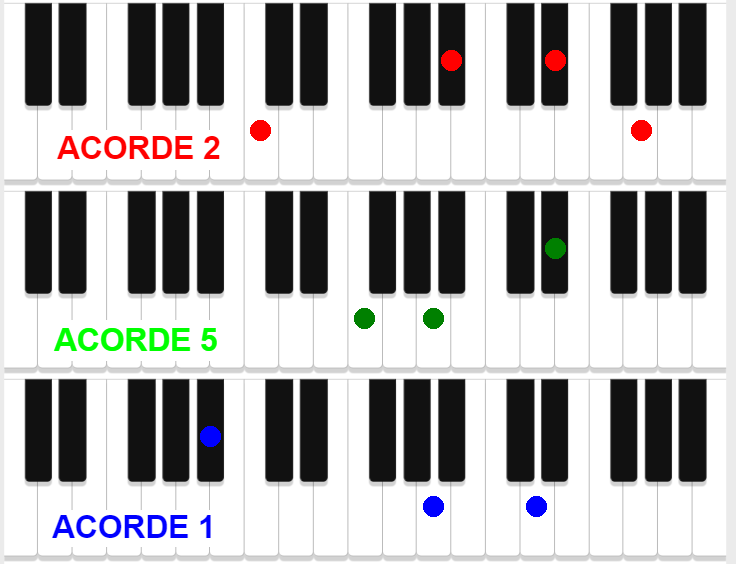

In [170]:
#MAIN MAIN
def main():
    
    
    #Open piano image
    ruta_imagen_piano = "/home/miguimorell/code/miguimorell/2-5-1/piano.webp"
    imagen_piano = Image.open(ruta_imagen_piano)

    #Input from user note:
    tonica=input("Please, introduce main note to get the notes for its secondth, fifth and first chord")
    
    #Get the notes from the tonic key
    notes=get_chord_notes(tonica)
    notes_2_chord=notes[0:4]
    notes_5_chord=notes[4:7]
    notes_1_chord=notes[7:11]
    coordenadas_list_second=[]
    coordenadas_list_five=[]
    coordenadas_list_one=[]
    
    for note in notes_2_chord: 
        coordenadas_list_second.append(get_coordinates(note))
        
    for note in notes_5_chord: 
        coordenadas_list_five.append(get_coordinates(note))
        
    for note in notes_1_chord: 
        coordenadas_list_one.append(get_coordinates(note))
    

    # Crea las tres imágenes con los círculos rojos para cada acorde
    seguidor=[]
    imagen_acorde_1,seguidor = draw_circle(tonica,seguidor,imagen_piano, coordenadas_list_second, "red")
    imagen_acorde_2,seguidor = draw_circle(tonica,seguidor,imagen_piano, coordenadas_list_five, "green")
    imagen_acorde_3,seguidor = draw_circle(tonica,seguidor,imagen_piano, coordenadas_list_one, "blue")

    # Combina las tres imágenes en una sola imagen final
    imagen_final=merge_images(imagen_acorde_1, imagen_acorde_2, imagen_acorde_3)
    
    imagen_final_with_titles=titles(imagen_final)
    
    # Guarda los cambios en la imagen final
    imagen_final_with_titles.save("piano_with_notes_and_photos.jpg")

    # Muestra la imagen final
    imagen_final_with_titles.show()
    
if __name__ == "__main__":
    main()
